<a href="https://colab.research.google.com/github/rezar12/ANN/blob/master/MemoireLASTEDVariantclade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MATRICE DATA CLADE

In [1]:
! pip install scikit-learn scikeras tensorflow pandas mlflow numpy plotly matplotlib imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 7.6 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 209 kB 74.0 MB/s 
     |████████████████████████████████| 181 kB 72.7 MB/s 
     |████████████████████████████████| 147 kB 75.3 MB/s 
     |████████████████████████████████| 79 kB 2.8 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 146 kB 77.6 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 59 kB 4.7 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.17.3-py3-none-any.whl size=139102 sha256=c3c2c65f4f88330072f3799c6584eb62ddcbd626f713f8d0e32e7997fb42587e
  Stored in directory: /root/.cache/pip/wheels/3f/73/87/c1e4b2145eb6049bb6c9aaf7ea1e38302b77ca219b6fef5d5c


In [2]:
import pandas as pd
import numpy as np

### data before ML prepocessing

In [3]:
! unzip '/content/MATRICESNPSCLADE.zip'

Archive:  /content/MATRICESNPSCLADE.zip
  inflating: Matriceclade.tsv        


In [4]:
dataclade = pd.read_csv('/content/Matriceclade.tsv',sep="\t",low_memory=False)

In [5]:
# remplacons les indices par le unnamed EPI_ISL
dataclade.index=dataclade['Unnamed: 0']

In [6]:
dataclade = dataclade.iloc[:,1:]

In [7]:
dataclade.index.names = ['Sequence']

In [8]:
dataclade

,SNP0,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,SNP10,...,SNP9537,SNP9538,SNP9539,SNP9540,SNP9543,SNP9544,SNP9545,SNP9546,SNP9547,clade
Sequence,,,,,,,,,,,,,,,,,,,,,
EPI_ISL_14799150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_14799151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_14799152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_14799154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_14799155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI_ISL_15125282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_15125283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)
EPI_ISL_15125284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22B (Omicron)


### data preposcessing

In [9]:
featurename = dataclade.columns

In [10]:
featurename

Index(['SNP0', 'SNP2', 'SNP3', 'SNP4', 'SNP5', 'SNP6', 'SNP7', 'SNP8', 'SNP9',
       'SNP10',
       ...
       'SNP9537', 'SNP9538', 'SNP9539', 'SNP9540', 'SNP9543', 'SNP9544',
       'SNP9545', 'SNP9546', 'SNP9547', 'clade'],
      dtype='object', length=8135)

In [11]:
dataclade['clade'].value_counts()

22B (Omicron)    5635
22A (Omicron)     655
recombinant       210
21L (Omicron)     188
Name: clade, dtype: int64

In [12]:
viz = pd.DataFrame(data={'clade':list(dataclade['clade'].value_counts().index), 'Nombres de sequence':list(dataclade['clade'].value_counts().values)})

In [13]:
from plotly import express as px

fig = px.bar(data_frame=viz,x='clade',y='Nombres de sequence',text_auto='.2s',
            title="NOMBRES DE SEQUENCES PAR CLADE")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### SMOTE

In [14]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [15]:
data=dataclade.values

In [16]:
X,y=data[:,:-1],data[:,-1]

In [17]:
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(y)

In [18]:
np.unique(encoded_Y)

array([0, 1, 2, 3])

classe: 22B (Omicron), nombres: 5635, ratio : 84.25538277511961
classe: 22A (Omicron), nombres: 655, ratio : 9.79366028708134
classe: recombinant, nombres: 210, ratio : 3.1399521531100474
classe: 21L (Omicron), nombres: 188, ratio : 2.811004784688995


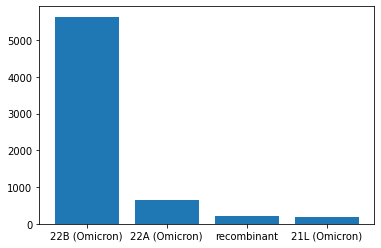

In [19]:
counter = Counter(encoder.inverse_transform(encoded_Y))
for k,v in counter.items():
  per = v / len(encoded_Y) * 100
  print(f'classe: {k}, nombres: {v}, ratio : {per}')
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
oversample = RandomOverSampler(random_state=42)

In [22]:
X_smote,y_smote = oversample.fit_resample(X,encoded_Y)

classe: 22B (Omicron), nombres: 5635, ratio : 84.25538277511961
classe: 22A (Omicron), nombres: 5635, ratio : 84.25538277511961
classe: recombinant, nombres: 5635, ratio : 84.25538277511961
classe: 21L (Omicron), nombres: 5635, ratio : 84.25538277511961


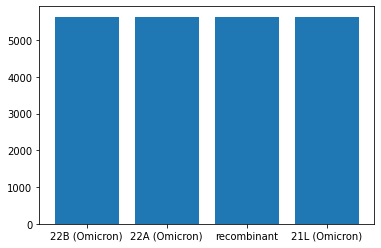

In [23]:
counter = Counter(encoder.inverse_transform(y_smote))
for k,v in counter.items():
  per = v / len(encoded_Y) * 100
  print(f'classe: {k}, nombres: {v}, ratio : {per}')
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [24]:
X = X_smote
Y = y_smote
# convert integers to dummy variables (i.e. one hot encoded)


In [25]:
np.unique(Y)

array([0, 1, 2, 3])

# Feature Reduction

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

In [27]:
Counter(encoder.inverse_transform(Y_train))

Counter({'recombinant': 3943,
         '21L (Omicron)': 3963,
         '22B (Omicron)': 3944,
         '22A (Omicron)': 3928})

In [28]:
Counter(encoder.inverse_transform(Y_test))

Counter({'recombinant': 1692,
         '22B (Omicron)': 1691,
         '22A (Omicron)': 1707,
         '21L (Omicron)': 1672})

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Convient uniquement à l'ensemble d'entraînement. 
scaler.fit(X_train)
# Appliquez la transformation à la fois à l'ensemble d'apprentissage et à l'ensemble de test. 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[-0.00796137, -0.00796137, -0.00796137, ..., -0.0421637 ,
        -0.00796137, -0.01379037],
       [-0.00796137, -0.00796137, -0.00796137, ..., -0.0421637 ,
        -0.00796137, -0.01379037],
       [-0.00796137, -0.00796137, -0.00796137, ..., -0.0421637 ,
        -0.00796137, -0.01379037],
       ...,
       [-0.00796137, -0.00796137, -0.00796137, ..., -0.0421637 ,
        -0.00796137, -0.01379037],
       [-0.00796137, -0.00796137, -0.00796137, ..., -0.0421637 ,
        -0.00796137, -0.01379037],
       [-0.00796137, -0.00796137, -0.00796137, ..., -0.0421637 ,
        -0.00796137, -0.01379037]])

# Mise en place de l'ACP avec une conservation de la variance a 95%

In [31]:
from sklearn.decomposition import PCA
# création d'une instance de l'acp
acp = PCA(.95)

In [32]:
acp.fit(X_train)

PCA(n_components=0.95)

In [33]:
X_train = acp.transform(X_train)
X_test = acp.transform(X_test)

In [34]:
X_train.shape

(15778, 2838)

# GRID SEARCH

In [35]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# creation du classifier reseau de neurone
def create_model():
	# creation du modele
	model = Sequential()
	model.add(Dense(200, input_shape=(X_train.shape[1],), activation='relu'))
	model.add(Dense(4, activation='softmax'))
	return model
# fix random seed for reproducibility


model = KerasClassifier(model=create_model, loss="categorical_crossentropy",verbose=1,metrics=['accuracy'])
# define the grid search parameters
batch_size= [16,32]
epochs=[10,20,30]
optimizer = ['SGD', 'RMSprop','Adam', 'Adamax']
param_grid = dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)

In [36]:
grid_result = grid.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/10
658/658 [==============================] - 2s 2ms/step - loss: 0.1741 - accuracy: 0.9550
Epoch 2/10
658/658 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.9962
Epoch 3/10
658/658 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9983
Epoch 4/10
658/658 [==============================] - 1s 2ms/step - loss: 0.0093 - accuracy: 0.9986
Epoch 5/10
658/658 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9987
Epoch 6/10
658/658 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9988
Epoch 7/10
658/658 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9990
Epoch 8/10
658/658 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9990
Epoch 9/10
658/658 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9990
Epoch 10/10
329/329 [==============================] - 0s 1ms/step
Epoch 1/10
658/658 [=============

In [37]:
# meilleur score de classication est :

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.997401 using {'batch_size': 16, 'epochs': 20, 'optimizer': 'Adam'}


# BEST MODEL

In [62]:
import tensorflow
classifier = Sequential()
classifier.add(Dense(200, input_shape=(X_train.shape[1],), activation='relu'))
classifier.add(Dense(4, activation='softmax'))
classifier.compile(loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam',metrics=["accuracy"])
# APPLIQUATION DU MODELE AU DONNÉES D'ENTRAINEMENT
history=classifier.fit(X_train,Y_train, epochs=20,batch_size=16,validation_data=(X_test, Y_test))

Epoch 1/20
987/987 [==============================] - 4s 3ms/step - loss: 0.1326 - accuracy: 0.9722 - val_loss: 0.0200 - val_accuracy: 0.9970
Epoch 2/20
987/987 [==============================] - 3s 3ms/step - loss: 0.0220 - accuracy: 0.9980 - val_loss: 0.0193 - val_accuracy: 0.9966
Epoch 3/20
987/987 [==============================] - 3s 3ms/step - loss: 0.0095 - accuracy: 0.9985 - val_loss: 0.0098 - val_accuracy: 0.9978
Epoch 4/20
987/987 [==============================] - 3s 3ms/step - loss: 0.0147 - accuracy: 0.9977 - val_loss: 0.0262 - val_accuracy: 0.9963
Epoch 5/20
987/987 [==============================] - 3s 3ms/step - loss: 0.0247 - accuracy: 0.9965 - val_loss: 0.0173 - val_accuracy: 0.9975
Epoch 6/20
987/987 [==============================] - 3s 3ms/step - loss: 0.0134 - accuracy: 0.9986 - val_loss: 0.0236 - val_accuracy: 0.9978
Epoch 7/20
987/987 [==============================] - 3s 3ms/step - loss: 0.0088 - accuracy: 0.9991 - val_loss: 0.0066 - val_accuracy: 0.9984
Epoch 

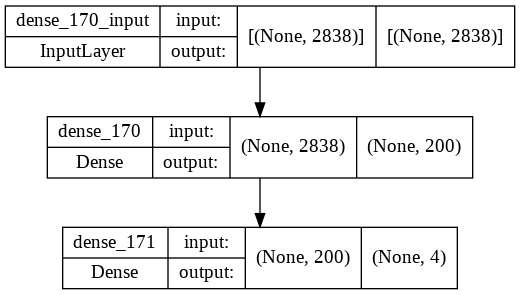

In [64]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [65]:
classifier.evaluate(X_test, Y_test)

212/212 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9982


[0.011242056265473366, 0.9982253909111023]

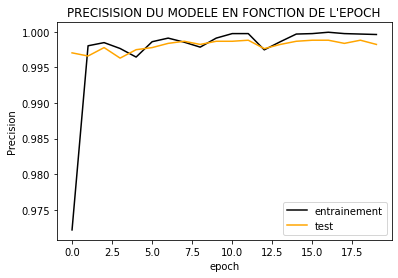

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color="black")
plt.plot(history.history['val_accuracy'],color="orange")
plt.title("PRECISISION DU MODELE EN FONCTION DE L'EPOCH")
plt.ylabel("Precision")
plt.xlabel("epoch")
plt.legend(['entrainement','test'],loc='lower right')
plt.show()

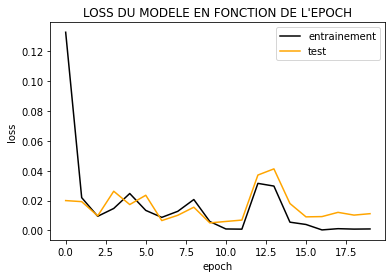

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color="black")
plt.plot(history.history['val_loss'],color="orange")
plt.title("LOSS DU MODELE EN FONCTION DE L'EPOCH")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['entrainement','test'],loc='upper right')
plt.show()

In [76]:
pred=classifier.predict(X_test)
Y_labelencodePred=np.argmax(pred, axis=1)

In [77]:
encoder.inverse_transform(Y_labelencodePred)

array(['recombinant', '22B (Omicron)', '22A (Omicron)', ...,
       '22A (Omicron)', 'recombinant', '22A (Omicron)'], dtype=object)

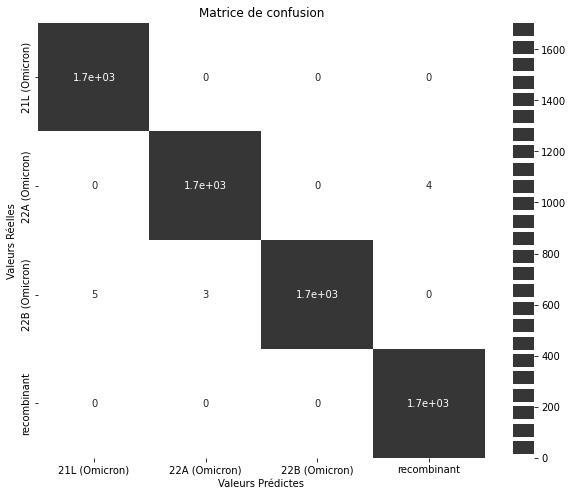

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
CM = confusion_matrix(encoder.inverse_transform(Y_test), encoder.inverse_transform(Y_labelencodePred))
mypalette = ['#ffff','#363636','#363636','#363636']
sns.heatmap(CM, annot=True,cmap=sns.color_palette(mypalette, 100),)
ax.set_xlabel('Valeurs Prédictes');ax.set_ylabel('Valeurs Réelles'); 
ax.set_title('Matrice de confusion'); 
ax.xaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_test)))); ax.yaxis.set_ticklabels(sorted(np.unique(encoder.inverse_transform(Y_labelencodePred))));

In [90]:
from sklearn.metrics import classification_report
report = classification_report(encoder.inverse_transform(Y_test), encoder.inverse_transform(Y_labelencodePred),labels=sorted(np.unique(encoder.inverse_transform(Y_test))),output_dict=True)

In [91]:
report

{'21L (Omicron)': {'precision': 0.9970184853905785,
  'recall': 1.0,
  'f1-score': 0.998507017020006,
  'support': 1672},
 '22A (Omicron)': {'precision': 0.9982415005861665,
  'recall': 0.9976567076742824,
  'f1-score': 0.9979490184588339,
  'support': 1707},
 '22B (Omicron)': {'precision': 1.0,
  'recall': 0.9952690715552928,
  'f1-score': 0.997628927089508,
  'support': 1691},
 'recombinant': {'precision': 0.9976415094339622,
  'recall': 1.0,
  'f1-score': 0.998819362455726,
  'support': 1692},
 'accuracy': 0.9982253771073647,
 'macro avg': {'precision': 0.9982253738526768,
  'recall': 0.9982314448073938,
  'f1-score': 0.9982260812560184,
  'support': 6762},
 'weighted avg': {'precision': 0.9982287168050721,
  'recall': 0.9982253771073647,
  'f1-score': 0.9982247240387645,
  'support': 6762}}

In [92]:
pd.DataFrame(data=report)

,21L (Omicron),22A (Omicron),22B (Omicron),recombinant,accuracy,macro avg,weighted avg
precision,0.997018,0.998242,1.000000,0.997642,0.998225,0.998225,0.998229
recall,1.000000,0.997657,0.995269,1.000000,0.998225,0.998231,0.998225
f1-score,0.998507,0.997949,0.997629,0.998819,0.998225,0.998226,0.998225
support,1672.000000,1707.000000,1691.000000,1692.000000,0.998225,6762.000000,6762.000000


In [110]:
dataplot = pd.DataFrame(data=report)
dataplot=dataplot.iloc[:,:-3]

In [111]:
dataplot=dataplot.T
dataplot=dataplot*100

In [112]:
dataplot

,precision,recall,f1-score,support
21L (Omicron),99.701849,100.000000,99.850702,167200.0
22A (Omicron),99.824150,99.765671,99.794902,170700.0
22B (Omicron),100.000000,99.526907,99.762893,169100.0
recombinant,99.764151,100.000000,99.881936,169200.0
